In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
email_df = pd.read_csv('emails.csv')

In [3]:
email_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [5]:
email_df.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
email_df.tail(10)

,text,spam
5718,"Subject: altos na gas model kim , i know you ...",0
5719,Subject: power market research i came across ...,0
5720,Subject: re : visit to houston fyi - - - - -...,0
5721,Subject: ees risk management presentations for...,0
5722,Subject: re : vacation vince : i just found ...,0
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [7]:
email_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [8]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


# Visualize the data

In [11]:
ham = email_df[email_df['spam']==0]

In [12]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [13]:
spam = email_df[email_df['spam']==1]

In [14]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [15]:
print('percentage spam = ', (len(spam)/len(email_df)*100),'%')

percentage spam =  23.88268156424581 %


In [16]:
print('percentage ham = ', (len(ham)/len(email_df)*100),'%')

percentage ham =  76.11731843575419 %


<AxesSubplot:xlabel='spam', ylabel='count'>

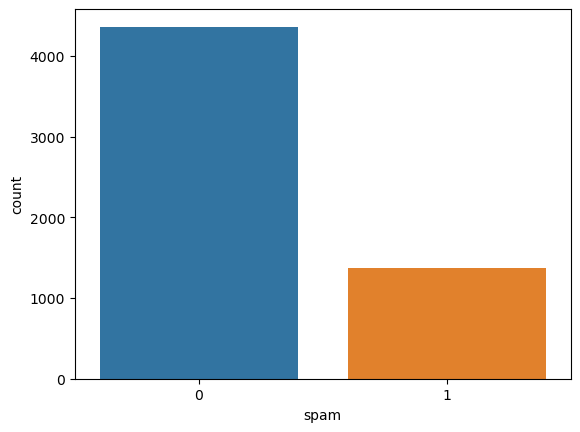

In [19]:
sns.countplot(x='spam', data = email_df, label='count')

Using Count to convert email text into numbers--
An example 

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is a text.','This is also a text.','This is a random example.']
vectorizer = CountVectorizer()

In [24]:
X = vectorizer.fit_transform(sample_data)

In [25]:
X

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [26]:
print(X.toarray())

[[0 0 1 0 1 1]
 [1 0 1 0 1 1]
 [0 1 1 1 0 1]]


In [29]:
print(vectorizer.get_feature_names_out()) 

['also' 'example' 'is' 'random' 'text' 'this']


Applying count vectorizer to our data

In [30]:
spamham_decode = vectorizer.fit_transform(email_df['text'])

In [31]:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [32]:
spamham_decode.shape

(5728, 37303)

In [33]:
print(spamham_decode.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Training the model/making predictions

In [34]:
label = email_df['spam'].values

In [35]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(spamham_decode,label)

MultinomialNB()

In [36]:
testing_sample = ['Free Money!!','Good morning, please call me okay!']

In [37]:
testing_sample_countvectorizer = vectorizer.transform(testing_sample)#takes the data and transforms into bunch of numbers

In [38]:
test_predict = nb_classifier.predict(testing_sample_countvectorizer)

In [39]:
test_predict

array([1, 0], dtype=int64)

In [43]:
testing_sample2 = ['Hii, hope you are doing well','This is about money!!']

In [44]:
testing_sample_countvectorizer2 = vectorizer.transform(testing_sample2)#takes the data and transforms into bunch of numbers
test_predict = nb_classifier.predict(testing_sample_countvectorizer2)

In [45]:
test_predict

array([0, 1], dtype=int64)

Splitting data into test and train

In [46]:
X = spamham_decode
y = label

In [48]:
X.shape
y.shape

(5728,)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [50]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

Evaluating the model

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
y_predict_train = nb_classifier.predict(X_train)

In [54]:
y_predict_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [55]:
cm = confusion_matrix(y_train, y_predict_train)

<AxesSubplot:>

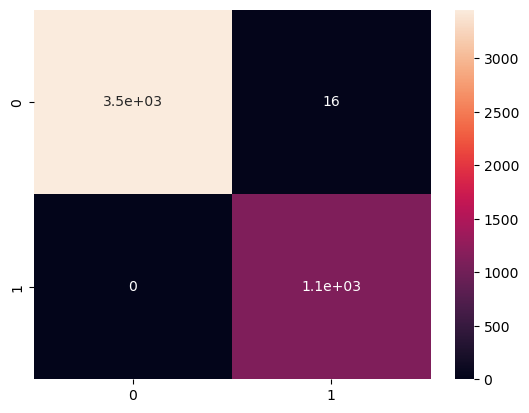

In [56]:
sns.heatmap(cm, annot=True)

In [57]:
y_predict_test = nb_classifier.predict(X_test)

In [58]:
cm  = confusion_matrix(y_test, y_predict_test)

<AxesSubplot:>

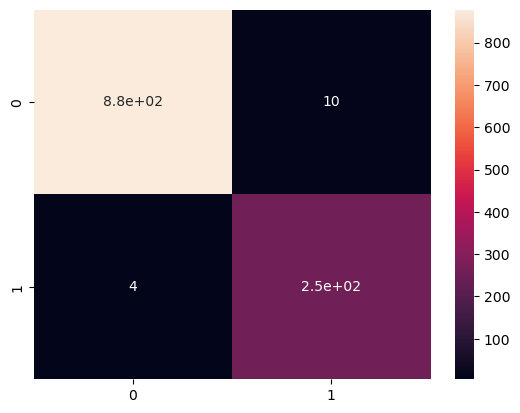

In [59]:
sns.heatmap(cm,annot=True)

In [60]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       888
           1       0.96      0.98      0.97       258

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146

